# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [4]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

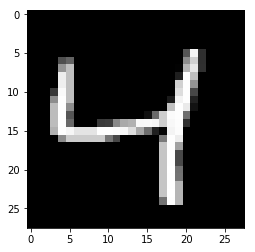

In [6]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [18]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

size = mnist.train.images.shape[1]

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, (None, size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, size), name='outputs')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation='relu')

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, size, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name='output')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)

# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [19]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [21]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6933
Epoch: 1/20... Training loss: 0.6905
Epoch: 1/20... Training loss: 0.6871
Epoch: 1/20... Training loss: 0.6831
Epoch: 1/20... Training loss: 0.6778
Epoch: 1/20... Training loss: 0.6719
Epoch: 1/20... Training loss: 0.6644
Epoch: 1/20... Training loss: 0.6565
Epoch: 1/20... Training loss: 0.6463
Epoch: 1/20... Training loss: 0.6351
Epoch: 1/20... Training loss: 0.6224
Epoch: 1/20... Training loss: 0.6065
Epoch: 1/20... Training loss: 0.5935
Epoch: 1/20... Training loss: 0.5770
Epoch: 1/20... Training loss: 0.5608
Epoch: 1/20... Training loss: 0.5426
Epoch: 1/20... Training loss: 0.5227
Epoch: 1/20... Training loss: 0.5065
Epoch: 1/20... Training loss: 0.4876
Epoch: 1/20... Training loss: 0.4681
Epoch: 1/20... Training loss: 0.4490
Epoch: 1/20... Training loss: 0.4320
Epoch: 1/20... Training loss: 0.4191
Epoch: 1/20... Training loss: 0.4024
Epoch: 1/20... Training loss: 0.3893
Epoch: 1/20... Training loss: 0.3754
Epoch: 1/20... Training loss: 0.3635
E

Epoch: 2/20... Training loss: 0.1815
Epoch: 2/20... Training loss: 0.1818
Epoch: 2/20... Training loss: 0.1867
Epoch: 2/20... Training loss: 0.1699
Epoch: 2/20... Training loss: 0.1789
Epoch: 2/20... Training loss: 0.1828
Epoch: 2/20... Training loss: 0.1820
Epoch: 2/20... Training loss: 0.1755
Epoch: 2/20... Training loss: 0.1763
Epoch: 2/20... Training loss: 0.1765
Epoch: 2/20... Training loss: 0.1691
Epoch: 2/20... Training loss: 0.1750
Epoch: 2/20... Training loss: 0.1808
Epoch: 2/20... Training loss: 0.1851
Epoch: 2/20... Training loss: 0.1768
Epoch: 2/20... Training loss: 0.1763
Epoch: 2/20... Training loss: 0.1785
Epoch: 2/20... Training loss: 0.1819
Epoch: 2/20... Training loss: 0.1852
Epoch: 2/20... Training loss: 0.1725
Epoch: 2/20... Training loss: 0.1755
Epoch: 2/20... Training loss: 0.1770
Epoch: 2/20... Training loss: 0.1715
Epoch: 2/20... Training loss: 0.1790
Epoch: 2/20... Training loss: 0.1780
Epoch: 2/20... Training loss: 0.1776
Epoch: 2/20... Training loss: 0.1784
E

Epoch: 2/20... Training loss: 0.1474
Epoch: 2/20... Training loss: 0.1479
Epoch: 2/20... Training loss: 0.1442
Epoch: 2/20... Training loss: 0.1487
Epoch: 2/20... Training loss: 0.1498
Epoch: 2/20... Training loss: 0.1452
Epoch: 2/20... Training loss: 0.1469
Epoch: 2/20... Training loss: 0.1481
Epoch: 2/20... Training loss: 0.1438
Epoch: 2/20... Training loss: 0.1485
Epoch: 2/20... Training loss: 0.1460
Epoch: 2/20... Training loss: 0.1431
Epoch: 2/20... Training loss: 0.1435
Epoch: 2/20... Training loss: 0.1467
Epoch: 2/20... Training loss: 0.1440
Epoch: 2/20... Training loss: 0.1441
Epoch: 2/20... Training loss: 0.1482
Epoch: 2/20... Training loss: 0.1446
Epoch: 2/20... Training loss: 0.1479
Epoch: 2/20... Training loss: 0.1428
Epoch: 2/20... Training loss: 0.1444
Epoch: 2/20... Training loss: 0.1421
Epoch: 2/20... Training loss: 0.1428
Epoch: 2/20... Training loss: 0.1449
Epoch: 2/20... Training loss: 0.1421
Epoch: 2/20... Training loss: 0.1441
Epoch: 3/20... Training loss: 0.1486
E

Epoch: 3/20... Training loss: 0.1256
Epoch: 3/20... Training loss: 0.1317
Epoch: 3/20... Training loss: 0.1286
Epoch: 3/20... Training loss: 0.1271
Epoch: 3/20... Training loss: 0.1303
Epoch: 3/20... Training loss: 0.1313
Epoch: 3/20... Training loss: 0.1307
Epoch: 3/20... Training loss: 0.1289
Epoch: 3/20... Training loss: 0.1236
Epoch: 3/20... Training loss: 0.1270
Epoch: 3/20... Training loss: 0.1299
Epoch: 3/20... Training loss: 0.1292
Epoch: 3/20... Training loss: 0.1287
Epoch: 3/20... Training loss: 0.1282
Epoch: 3/20... Training loss: 0.1246
Epoch: 3/20... Training loss: 0.1364
Epoch: 3/20... Training loss: 0.1321
Epoch: 3/20... Training loss: 0.1244
Epoch: 3/20... Training loss: 0.1249
Epoch: 3/20... Training loss: 0.1302
Epoch: 3/20... Training loss: 0.1321
Epoch: 3/20... Training loss: 0.1333
Epoch: 3/20... Training loss: 0.1320
Epoch: 3/20... Training loss: 0.1274
Epoch: 3/20... Training loss: 0.1277
Epoch: 3/20... Training loss: 0.1266
Epoch: 3/20... Training loss: 0.1269
E

Epoch: 4/20... Training loss: 0.1214
Epoch: 4/20... Training loss: 0.1229
Epoch: 4/20... Training loss: 0.1188
Epoch: 4/20... Training loss: 0.1170
Epoch: 4/20... Training loss: 0.1146
Epoch: 4/20... Training loss: 0.1127
Epoch: 4/20... Training loss: 0.1185
Epoch: 4/20... Training loss: 0.1174
Epoch: 4/20... Training loss: 0.1185
Epoch: 4/20... Training loss: 0.1188
Epoch: 4/20... Training loss: 0.1178
Epoch: 4/20... Training loss: 0.1187
Epoch: 4/20... Training loss: 0.1183
Epoch: 4/20... Training loss: 0.1177
Epoch: 4/20... Training loss: 0.1146
Epoch: 4/20... Training loss: 0.1175
Epoch: 4/20... Training loss: 0.1183
Epoch: 4/20... Training loss: 0.1134
Epoch: 4/20... Training loss: 0.1198
Epoch: 4/20... Training loss: 0.1184
Epoch: 4/20... Training loss: 0.1211
Epoch: 4/20... Training loss: 0.1207
Epoch: 4/20... Training loss: 0.1235
Epoch: 4/20... Training loss: 0.1195
Epoch: 4/20... Training loss: 0.1116
Epoch: 4/20... Training loss: 0.1183
Epoch: 4/20... Training loss: 0.1214
E

Epoch: 5/20... Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1124
Epoch: 5/20... Training loss: 0.1107
Epoch: 5/20... Training loss: 0.1122
Epoch: 5/20... Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1117
Epoch: 5/20... Training loss: 0.1142
Epoch: 5/20... Training loss: 0.1148
Epoch: 5/20... Training loss: 0.1122
Epoch: 5/20... Training loss: 0.1093
Epoch: 5/20... Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1139
Epoch: 5/20... Training loss: 0.1090
Epoch: 5/20... Training loss: 0.1121
Epoch: 5/20... Training loss: 0.1104
Epoch: 5/20... Training loss: 0.1158
Epoch: 5/20... Training loss: 0.1117
Epoch: 5/20... Training loss: 0.1113
Epoch: 5/20... Training loss: 0.1091
Epoch: 5/20... Training loss: 0.1077
Epoch: 5/20... Training loss: 0.1094
Epoch: 5/20... Training loss: 0.1096
Epoch: 5/20... Training loss: 0.1090
Epoch: 5/20... Training loss: 0.1123
Epoch: 5/20... Training loss: 0.1110
Epoch: 5/20... Training loss: 0.1121
Epoch: 5/20... Training loss: 0.1115
E

Epoch: 6/20... Training loss: 0.1072
Epoch: 6/20... Training loss: 0.1078
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1032
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1121
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1076
Epoch: 6/20... Training loss: 0.1089
Epoch: 6/20... Training loss: 0.1097
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1024
Epoch: 6/20... Training loss: 0.1088
Epoch: 6/20... Training loss: 0.1095
Epoch: 6/20... Training loss: 0.1011
Epoch: 6/20... Training loss: 0.1078
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1070
Epoch: 6/20... Training loss: 0.1110
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1090
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1045
E

Epoch: 7/20... Training loss: 0.1030
Epoch: 7/20... Training loss: 0.1052
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.0988
Epoch: 7/20... Training loss: 0.1087
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1047
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1047
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.1067
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.1065
Epoch: 7/20... Training loss: 0.1056
Epoch: 7/20... Training loss: 0.1041
Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.1040
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1038
Epoch: 7/20... Training loss: 0.1035
Epoch: 7/20... Training loss: 0.1038
Epoch: 7/20... Training loss: 0.1028
E

Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.0975
Epoch: 7/20... Training loss: 0.0982
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.1007
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.1009
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.1013
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.1015
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0984
E

Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.1003
Epoch: 8/20... Training loss: 0.0962
Epoch: 8/20... Training loss: 0.0937
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0928
Epoch: 8/20... Training loss: 0.1019
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.1009
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0983
E

Epoch: 9/20... Training loss: 0.0939
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0914
Epoch: 9/20... Training loss: 0.0940
Epoch: 9/20... Training loss: 0.0922
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0939
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0947
Epoch: 9/20... Training loss: 0.0900
Epoch: 9/20... Training loss: 0.0937
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0921
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0998
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0940
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0954
E

Epoch: 10/20... Training loss: 0.0994
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0989
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0993
Epoch: 10/20... Training loss: 0.0982
Epoch: 10/20... Training loss: 0.0932
Epoch: 10/20... Training loss: 0.0934
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0989
Epoch: 10/20... Training loss: 0.0910
Epoch: 10/20... Training loss: 0.0930
Epoch: 10/20... Training loss: 0.0984
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0979
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0992
Epoch: 11/20... Training loss: 0.0985
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0971
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20... Training loss: 0.0974
Epoch: 11/20... Training loss: 0.0972
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0925
Epoch: 11/20... Training loss: 0.0903
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0980
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0900
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0971
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0911
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0969
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0973
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0981
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0920
Epoch: 12/20... Training loss: 0.0971
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0922
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0968
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0974
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0999
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0961
Epoch: 13/20... Training loss: 0.0906
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0913
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0962
Epoch: 13/20... Training loss: 0.0962
Epoch: 13/20... Training loss: 0.0908
Epoch: 13/20... Training loss: 0.0976
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0919
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0919
Epoch: 13/20... Training loss: 0.0962
Epoch: 13/20... Training loss: 0.0962
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0990
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20... Training loss: 0.0916
Epoch: 14/20... Training loss: 0.0967
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0964
Epoch: 14/20... Training loss: 0.0901
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0979
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0962
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0881
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0907
Epoch: 15/20... Training loss: 0.0897
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20... Training loss: 0.0973
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0903
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0909
Epoch: 15/20... Training loss: 0.0881
Epoch: 15/20... Training loss: 0.0910
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0907
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0875
Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0958
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0896
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0886
Epoch: 16/20... Training loss: 0.0903
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20

Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0980
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0967
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0898
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0973
Epoch: 16/20... Training loss: 0.0908
Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0912
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0983
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0985
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0881
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20... Training loss: 0.0962
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20... Training loss: 0.0983
Epoch: 17/20... Training loss: 0.0963
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0904
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0888
Epoch: 18/20... Training loss: 0.0989
Epoch: 18/20... Training loss: 0.0955
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0958
Epoch: 18/20... Training loss: 0.0907
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0909
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0912
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0955
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0903
Epoch: 18/20... Training loss: 0.0911
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0907
Epoch: 18/20... Training loss: 0.0964
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0949
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0976
Epoch: 19/20... Training loss: 0.0896
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0902
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0965
Epoch: 19/20... Training loss: 0.0949
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0963
Epoch: 19/20... Training loss: 0.0892
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0959
Epoch: 19/20... Training loss: 0.0913
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0895
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0962
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0967
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0896
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0955
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0897
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

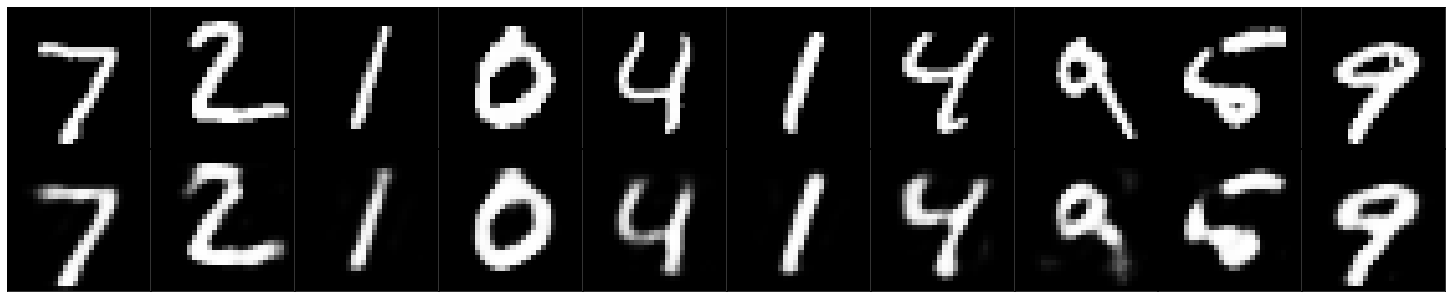

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [24]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.